### About

A first attempt to paly arround with the [TensorFlow](https://www.tensorflow.org/) library. Mainly based on the following articles:
* [Библиотека глубокого обучения Tensorflow](https://habrahabr.ru/company/ods/blog/324898/)
    + https://github.com/hydrophis-spiralis/intro_tf

#### Installation

* Follow instruction provided on the official web-site for the conda [here](https://www.tensorflow.org/install/install_windows)
* Install and activate "ipykernel" (more [here(https://stackoverflow.com/questions/37085665/in-which-conda-environment-is-jupyter-executing)] and inside bat file)

#### Dependencies

* ipykernel
* tqdm
* matplotlib
* seaborn
* scikit-learn

### Additional

In order to serve models trained with help of the tensorflow, there is a tool called [TensorFlow Serving](https://www.tensorflow.org/serving/). It allows to expose trained models via REST API. All you need is to install the tool and implement a small code in Python. More could be found here:
* [Делаем сервис по распознаванию изображений с помощью TensorFlow Serving](https://habrahabr.ru/company/ods/blog/332584/)

#### Check TF and conda Environments

In [1]:
!conda list

# packages in environment at C:\Soft\Anaconda3\envs\tensorflow:
#
# Name                    Version                   Build  Channel
absl-py                   0.1.10                    <pip>
astor                     0.6.2                     <pip>
backports                 1.0              py35he88aa47_1  
backports.weakref         1.0rc1                   py35_0  
bleach                    1.5.0                    py35_0  
bleach                    1.5.0                     <pip>
ca-certificates           2017.08.26           h94faf87_0  
certifi                   2018.1.18                py35_0  
colorama                  0.3.9                     <pip>
cycler                    0.10.0           py35hcc71164_0  
decorator                 4.2.1                     <pip>
freetype                  2.8                  h51f8f2c_1  
gast                      0.2.0                     <pip>
grpcio                    1.11.0                    <pip>
h5py                      2.7.1          

In [2]:
import sys
print('Path to the executable: {0}'.format(sys.executable))

Path to the executable: C:\Soft\Anaconda3\envs\tensorflow\python.exe


In [3]:
# checking tensorflow installation

import tensorflow as tf # подключаем TF
print ('TF version: {0}\n'.format(tf.__version__))
hello = tf.constant('Hello, TensorFlow!') # создаем объект из TF
sess = tf.InteractiveSession() # создаем сессию
print(sess.run(hello)) #сессия "выполняет" объект

C:\Soft\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TF version: 1.8.0

b'Hello, TensorFlow!'


In [4]:
# zero tensor

zeros_tensor = tf.zeros([3, 3])
print(zeros_tensor.eval())
print(zeros_tensor)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Tensor("zeros:0", shape=(3, 3), dtype=float32)


In [5]:
a = tf.truncated_normal([2, 2])
b = tf.fill([2, 2], 0.5)
print(sess.run(a + b))
print(sess.run(a - b))
print(sess.run(a * b))
print(sess.run(tf.matmul(a, b)))

[[ 1.0522141 -0.2843296]
 [-0.2114731  1.6175878]]
[[-0.31125382  0.1954813 ]
 [ 0.5814539  -0.6966281 ]]
[[0.9514758  0.01772214]
 [0.02126906 0.22953655]]
[[-0.55547136 -0.55547136]
 [-0.2754612  -0.2754612 ]]


In [6]:
v = tf.Variable(zeros_tensor)
sess.run(v.initializer)
v.eval()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [7]:
# placeholders - 01

a = tf.placeholder("float")
b = tf.placeholder("float")
y = tf.multiply(a, b)
print(sess.run(y, feed_dict={a:100, b:25}))

2500.0


In [8]:
# placeholders - 02

x = tf.placeholder(tf.float32)
f =  1 + 2 * x + tf.pow(x, 2)
sess.run(f, feed_dict={x: 10})

121.0

In [9]:
import numpy as np

x = tf.placeholder(dtype=tf.float32)
sigma = 1 / (1 + tf.exp(-x))
sigma.eval(feed_dict={x: np.linspace(-5, 5) })

array([0.00669285, 0.00819568, 0.01003255, 0.01227603, 0.01501357,
       0.01835024, 0.02241159, 0.02734679, 0.03333168, 0.04057176,
       0.04930425, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578245, 0.14998817, 0.17790413, 0.20973383, 0.24555731,
       0.2852907 , 0.32865256, 0.3751457 , 0.42406148, 0.47451192,
       0.5254881 , 0.5759385 , 0.6248543 , 0.67134744, 0.71470934,
       0.7544427 , 0.79026616, 0.8220959 , 0.8500118 , 0.87421757,
       0.8949994 , 0.91269064, 0.9276421 , 0.9402008 , 0.9506957 ,
       0.9594282 , 0.96666825, 0.97265327, 0.9775884 , 0.9816498 ,
       0.98498636, 0.98772395, 0.98996747, 0.99180436, 0.9933072 ],
      dtype=float32)

### TF Example 01 - A Simple LR

In [10]:
%matplotlib inline

import os
import tqdm
import seaborn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from pylab import rcParams
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [11]:
# global IPython settings

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# plt
rcParams['figure.figsize'] = 30, 15

In [12]:
# some evn settings

if not os.path.exists('pngs/'):
    os.makedirs('pngs/')

C:\Soft\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


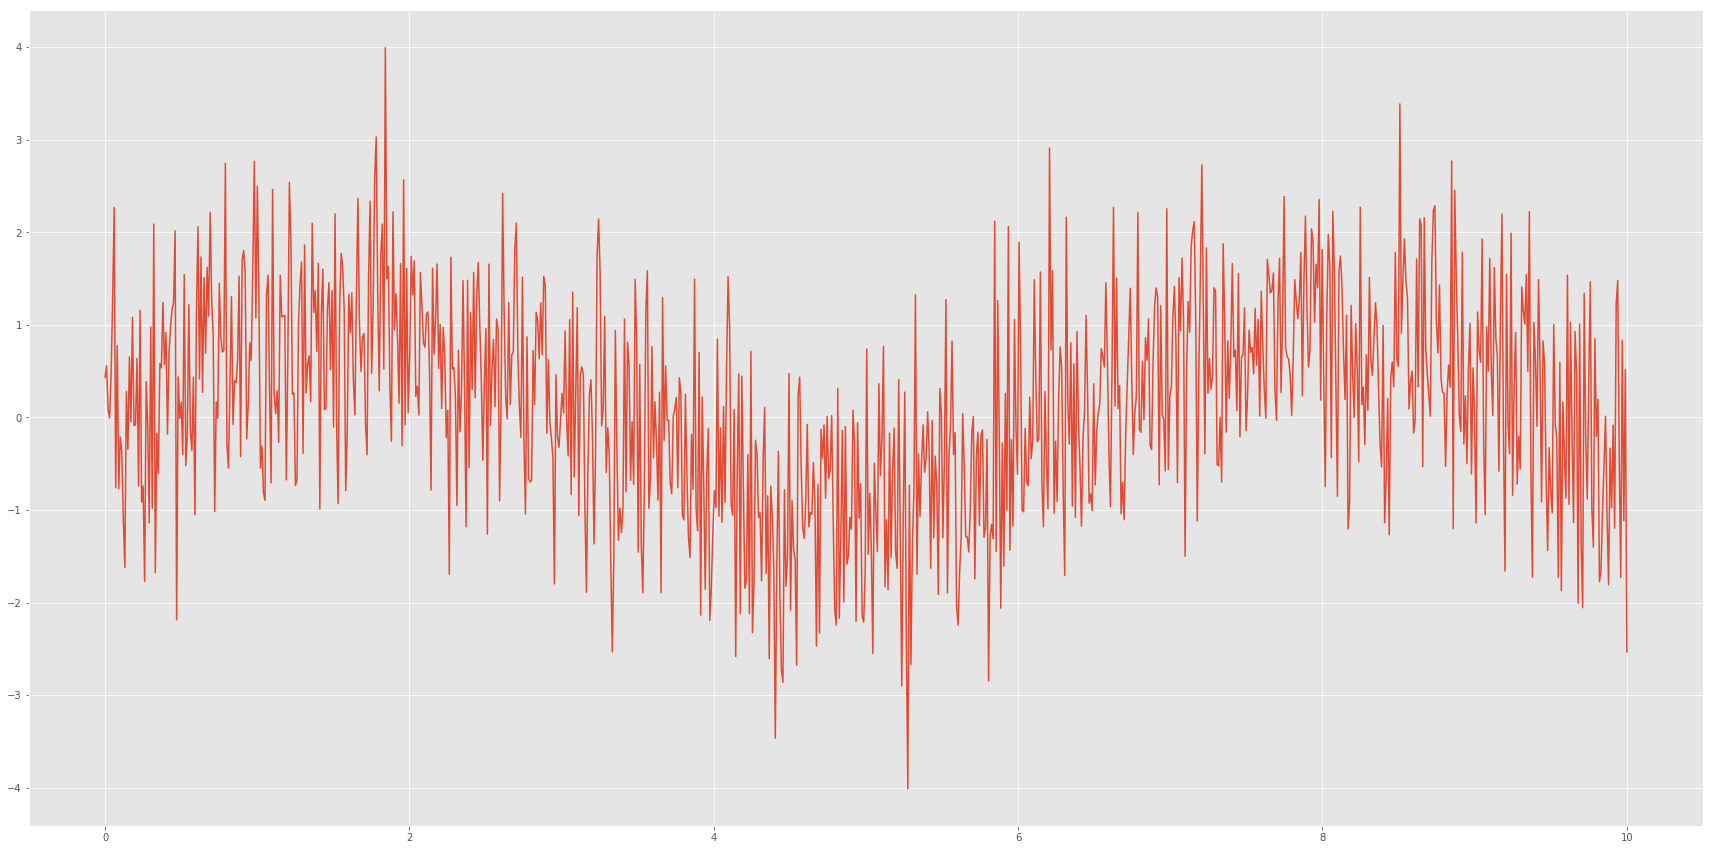

In [13]:
sess = tf.InteractiveSession()

# создадим выборку
x = np.linspace(0,10, 1000)
y = np.sin(x) + np.random.normal(size=len(x))

plt.plot(x,y)
plt.show()

In [14]:
# Разобьем её на тренировочную и контрольную части

train_idxes = np.random.choice(list(range(len(x))), 3 * len(x)//4)
test_idxes = np.array(range(len(x)))
test_idxes = np.delete(test_idxes, train_idxes)

X_Train = x[train_idxes]
Y_Train = y[train_idxes]

X_Test = x[test_idxes]
Y_Test = y[test_idxes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 840.25it/s]


[2.6356251, 2.6186059, 2.601816, 2.585251, 2.5689085, 2.5527856, 2.5368788, 2.5211856, 2.5057034, 2.490429]
[2.5955703, 2.5782015, 2.5610614, 2.5441477, 2.5274572, 2.5109866, 2.494733, 2.4786947, 2.4628677, 2.4472494]


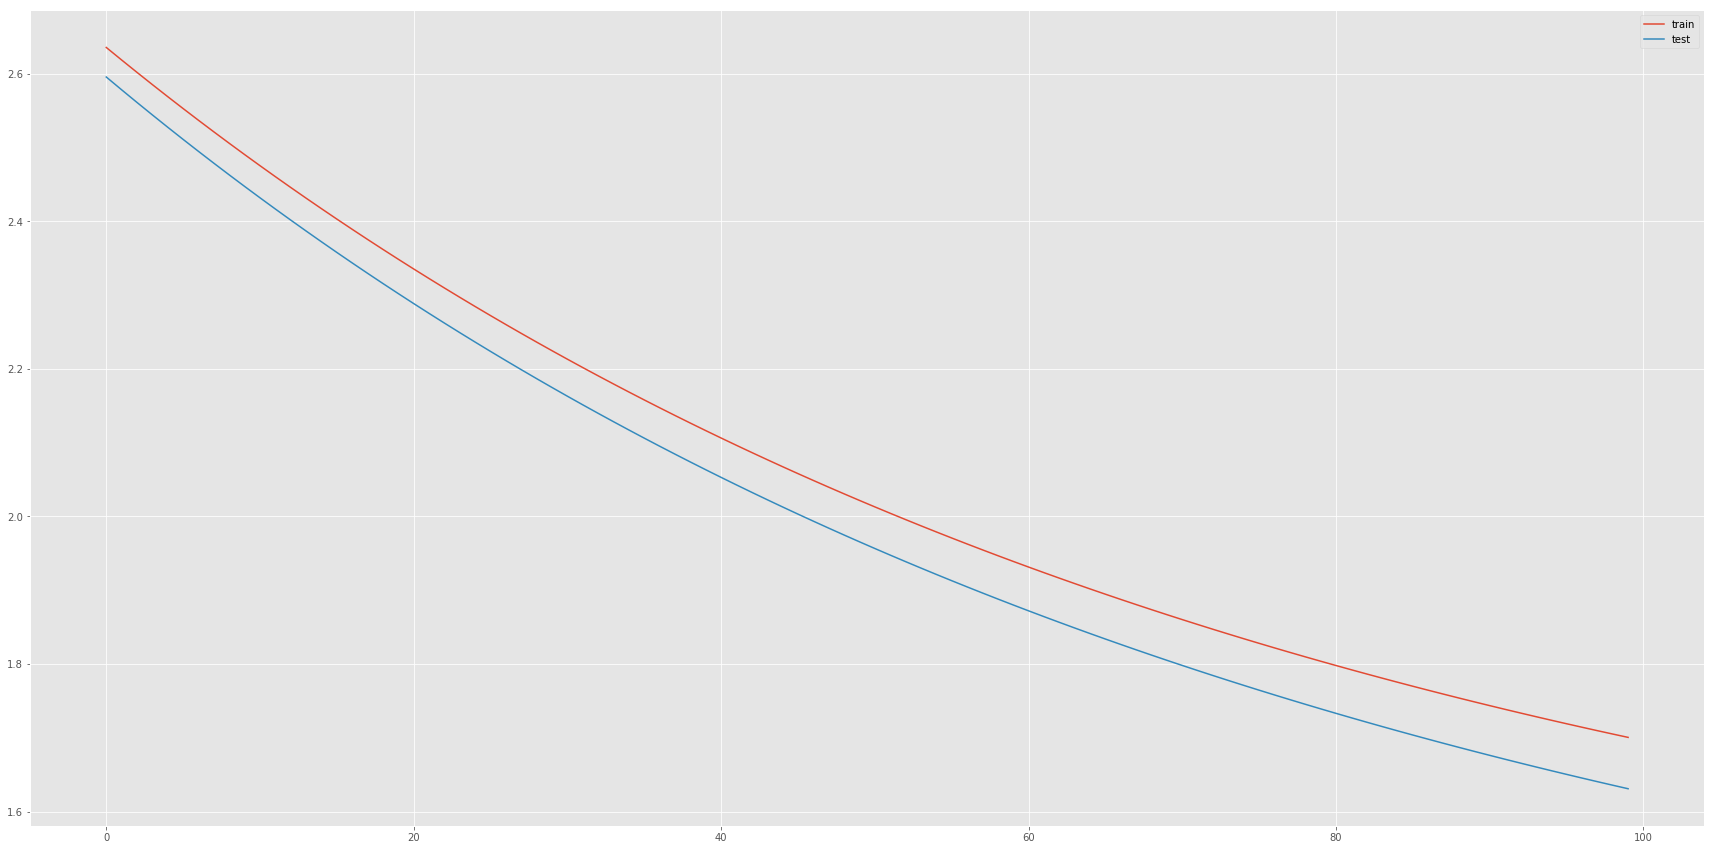

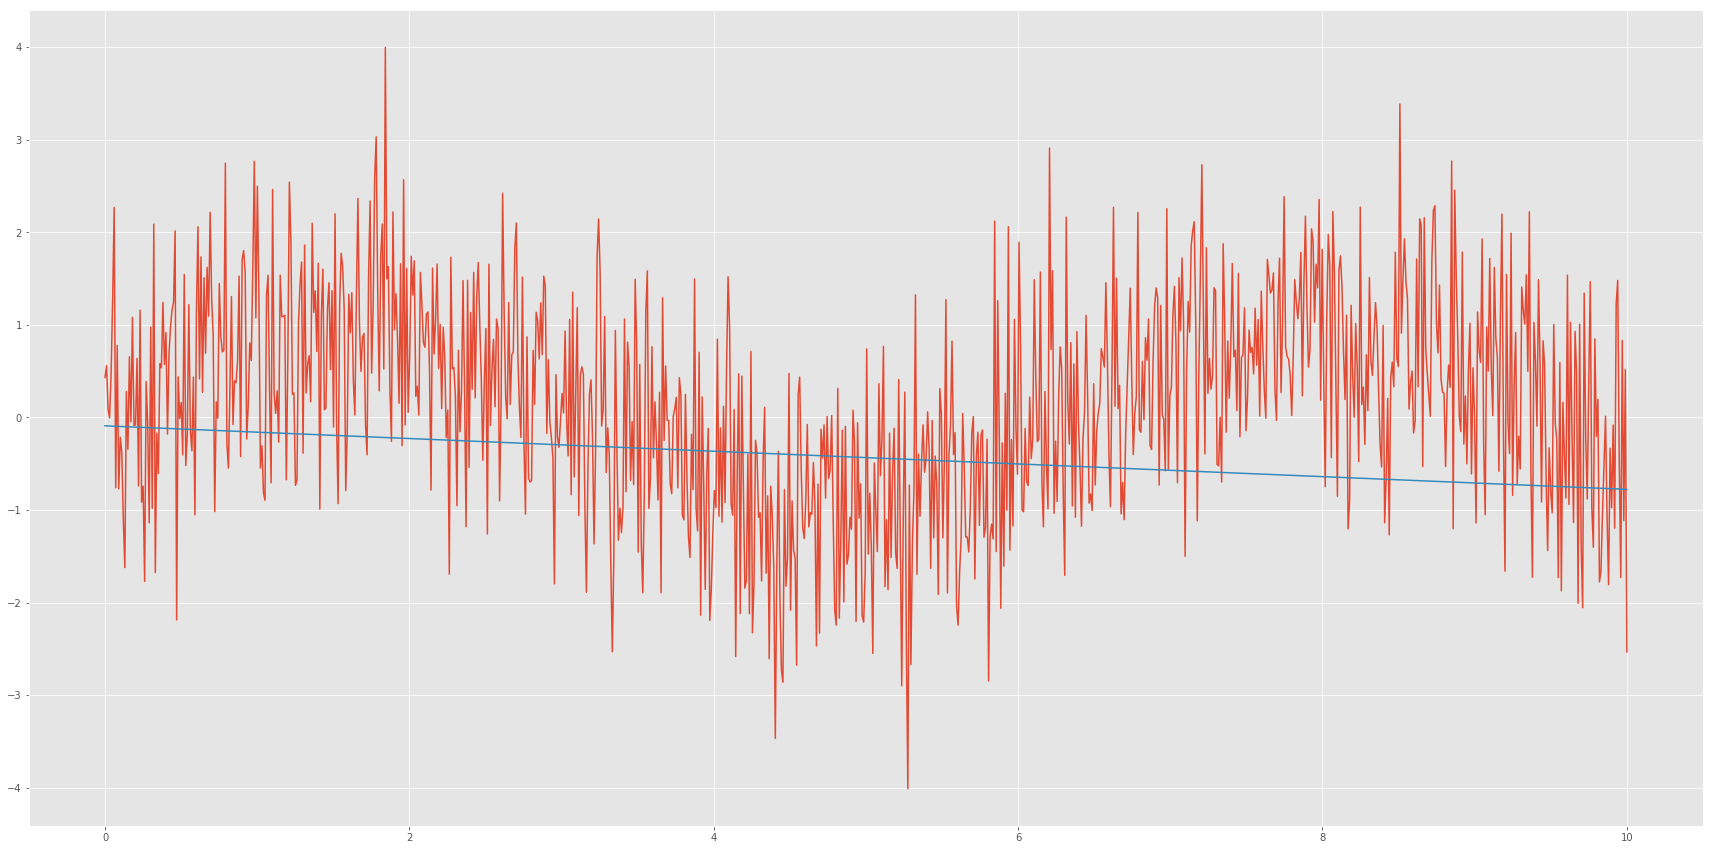

In [15]:
# Создадим граф

x_ = tf.placeholder(name="input", shape=[None, 1], dtype=tf.float32)
y_ = tf.placeholder(name= "output", shape=[None, 1], dtype=tf.float32)

model_output = tf.Variable(tf.random_normal([1]), name='bias') + tf.Variable(tf.random_normal([1]), name='k') * x_ # k*x+b

loss = tf.reduce_mean(tf.pow(y_ - model_output, 2)) # функция потерь
gd = tf.train.GradientDescentOptimizer(0.0001) #оптимизатор
train_step = gd.minimize(loss)
sess.run(tf.global_variables_initializer())

n_epochs = 100
train_errors = []
test_errors = []
for i in tqdm.tqdm(range(n_epochs)): # 100 
    _, train_err = sess.run([train_step, loss ], feed_dict={x_:X_Train.reshape((len(X_Train),1)) , y_: Y_Train.reshape((len(Y_Train),1))})
    train_errors.append(train_err)
    test_errors.append(sess.run(loss, feed_dict={x_:X_Test.reshape((len(X_Test),1)) , y_: Y_Test.reshape((len(Y_Test),1))}))
    
print(train_errors[:10])
print(test_errors[:10])

# plotting 
plt.plot(list(range(n_epochs)), train_errors, label = 'train' )
plt.plot(list(range(n_epochs)), test_errors, label='test') 
plt.legend()
plt.savefig('pngs/lr_.png')
plt.show()

plt.plot(x, y)
plt.plot(x,sess.run(model_output, feed_dict={x_:x.reshape((len(x),1))}))
plt.savefig("pngs/lr_forward_pass.png")
plt.show()

### TF Example 02 - A Simple Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from tensorflow.python.framework import ops
ops.reset_default_graph()

C:\Soft\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


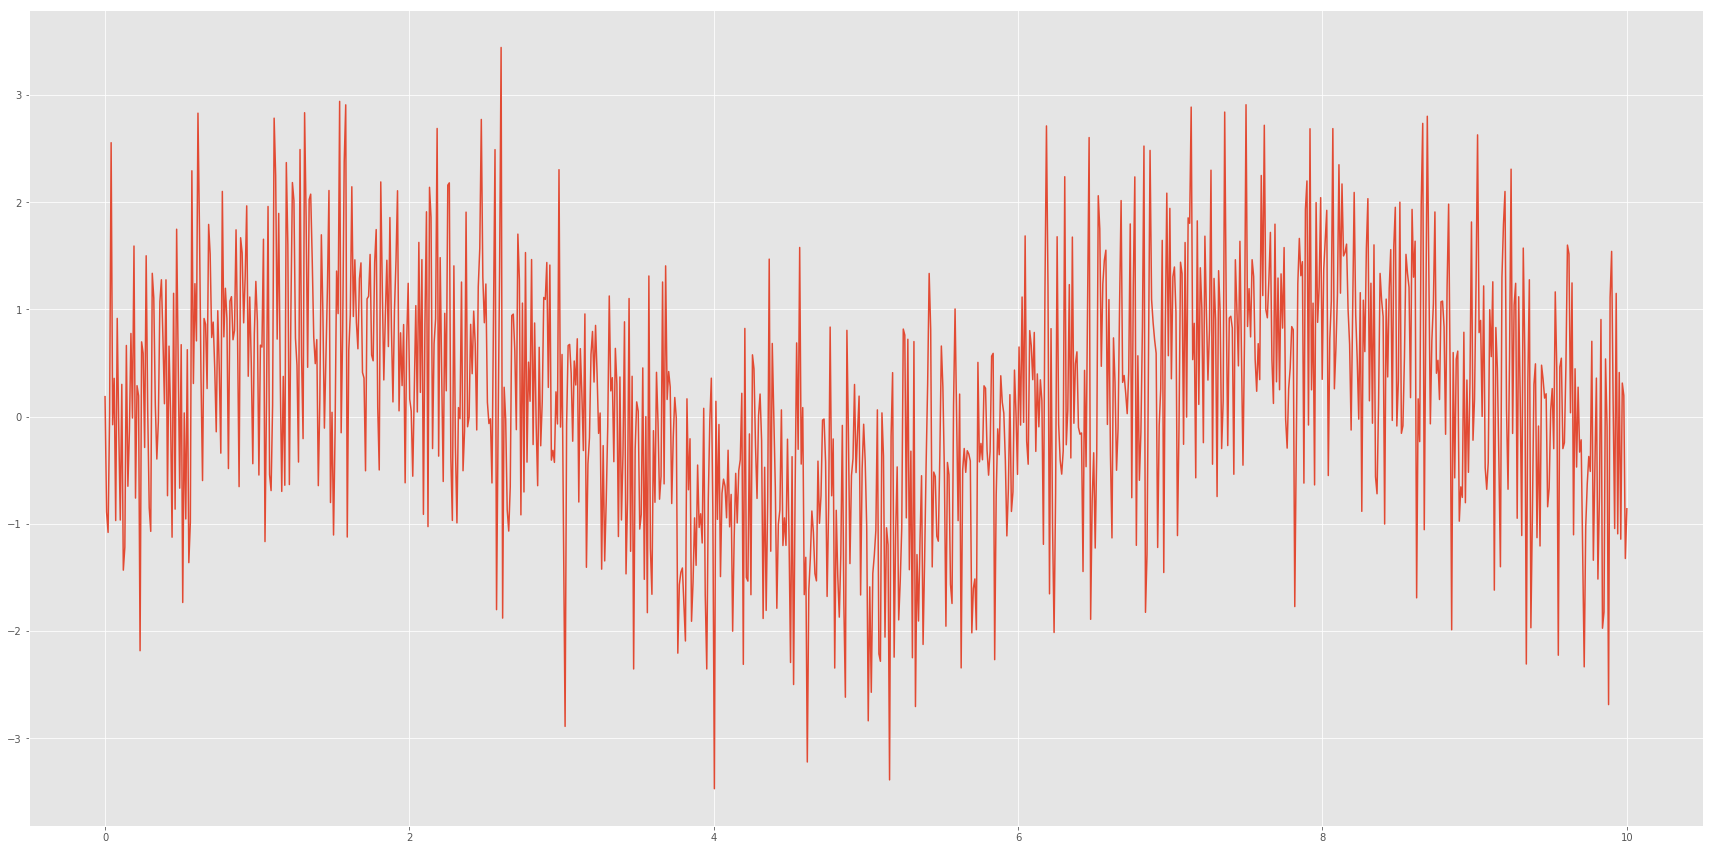

In [17]:
order = 30
sess =tf.InteractiveSession()

# создадим выборку
x = np.linspace(0,10, 1000)
y = np.sin(x) + np.random.normal(size=len(x))

plt.plot(x,y)
plt.show()

In [18]:
poly_features = PolynomialFeatures(degree=order-1)
s = StandardScaler()
x_poly = s.fit_transform(poly_features.fit_transform(x.reshape(1000,1)))

# и разобьем её на тренировочную и контрольную части
shuffle_idxs =np.arange(len(x_poly))
np.random.shuffle(shuffle_idxs)

X_Train = x_poly[shuffle_idxs[:3*len(x)//4]]
Y_Train = y[shuffle_idxs[:3*len(x)//4]]

X_Test = x_poly[shuffle_idxs[3*len(x)//4:]]
Y_Test = y[shuffle_idxs[3*len(x)//4:]]

In [19]:
# Создадим граф

x_ = tf.placeholder(name="input", shape=[None, order], dtype=tf.float32)
y_ = tf.placeholder(name= "output", shape=[None, 1], dtype=tf.float32)

w = tf.Variable(tf.random_normal([order,1]), name='weights')

model_output = tf.matmul(x_,w)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1031.94it/s]


[44.11441, 21.172857, 16.848553, 15.803451, 15.347108, 15.00632, 14.696972, 14.403396, 14.121991, 13.851388]
[19.861526, 16.819696, 15.974152, 15.543221, 15.203085, 14.892161, 14.5974, 14.315179, 14.043954, 13.782712]


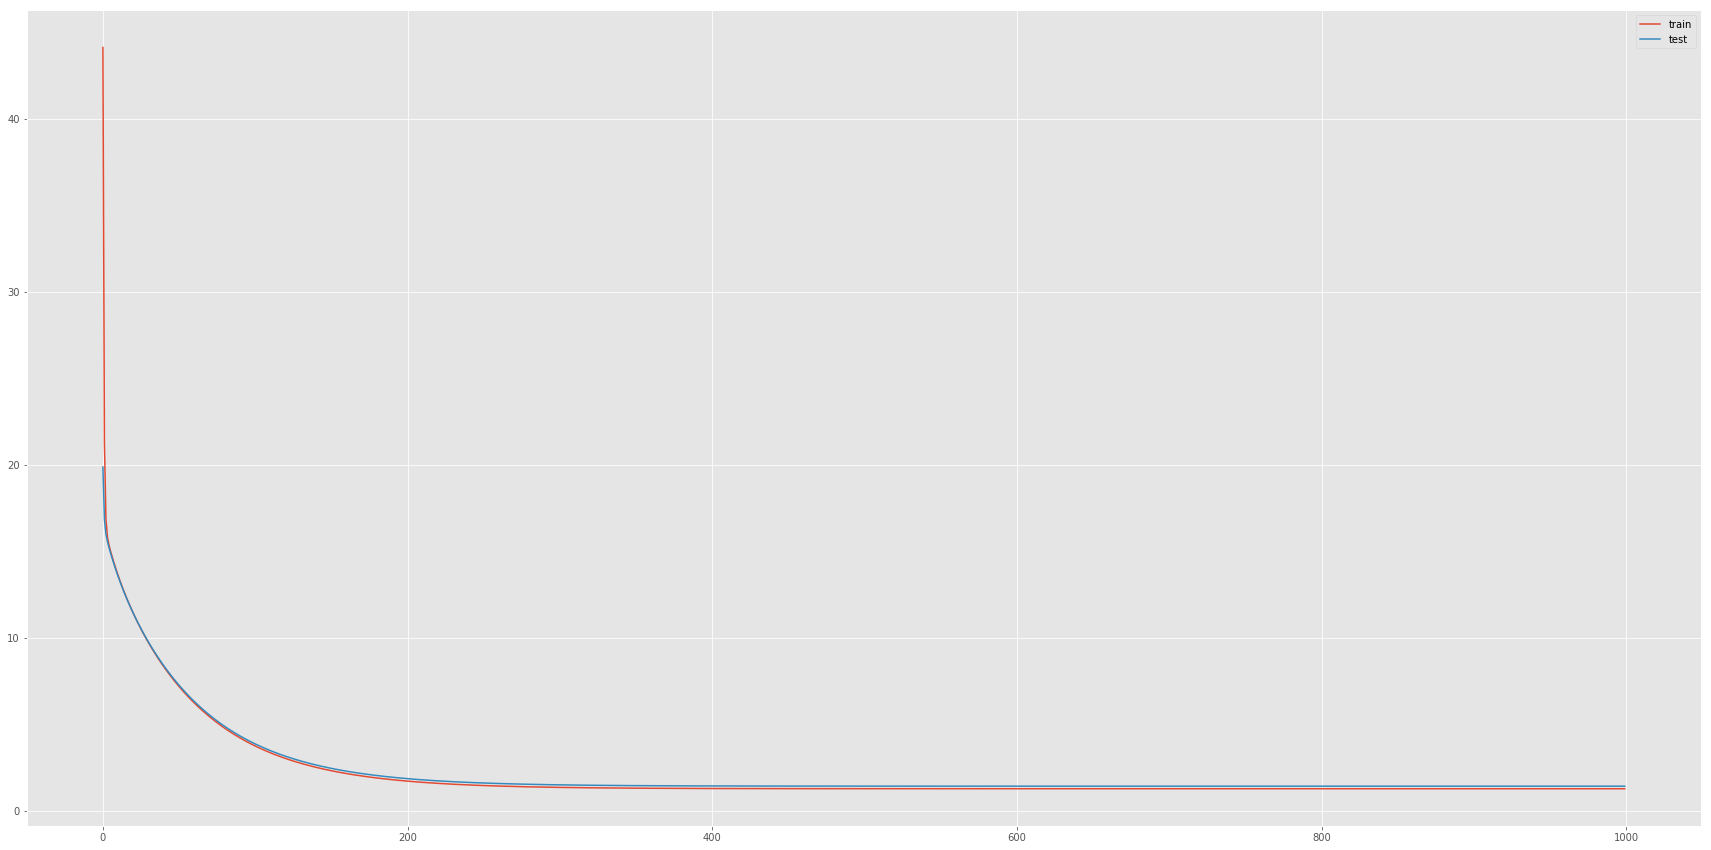

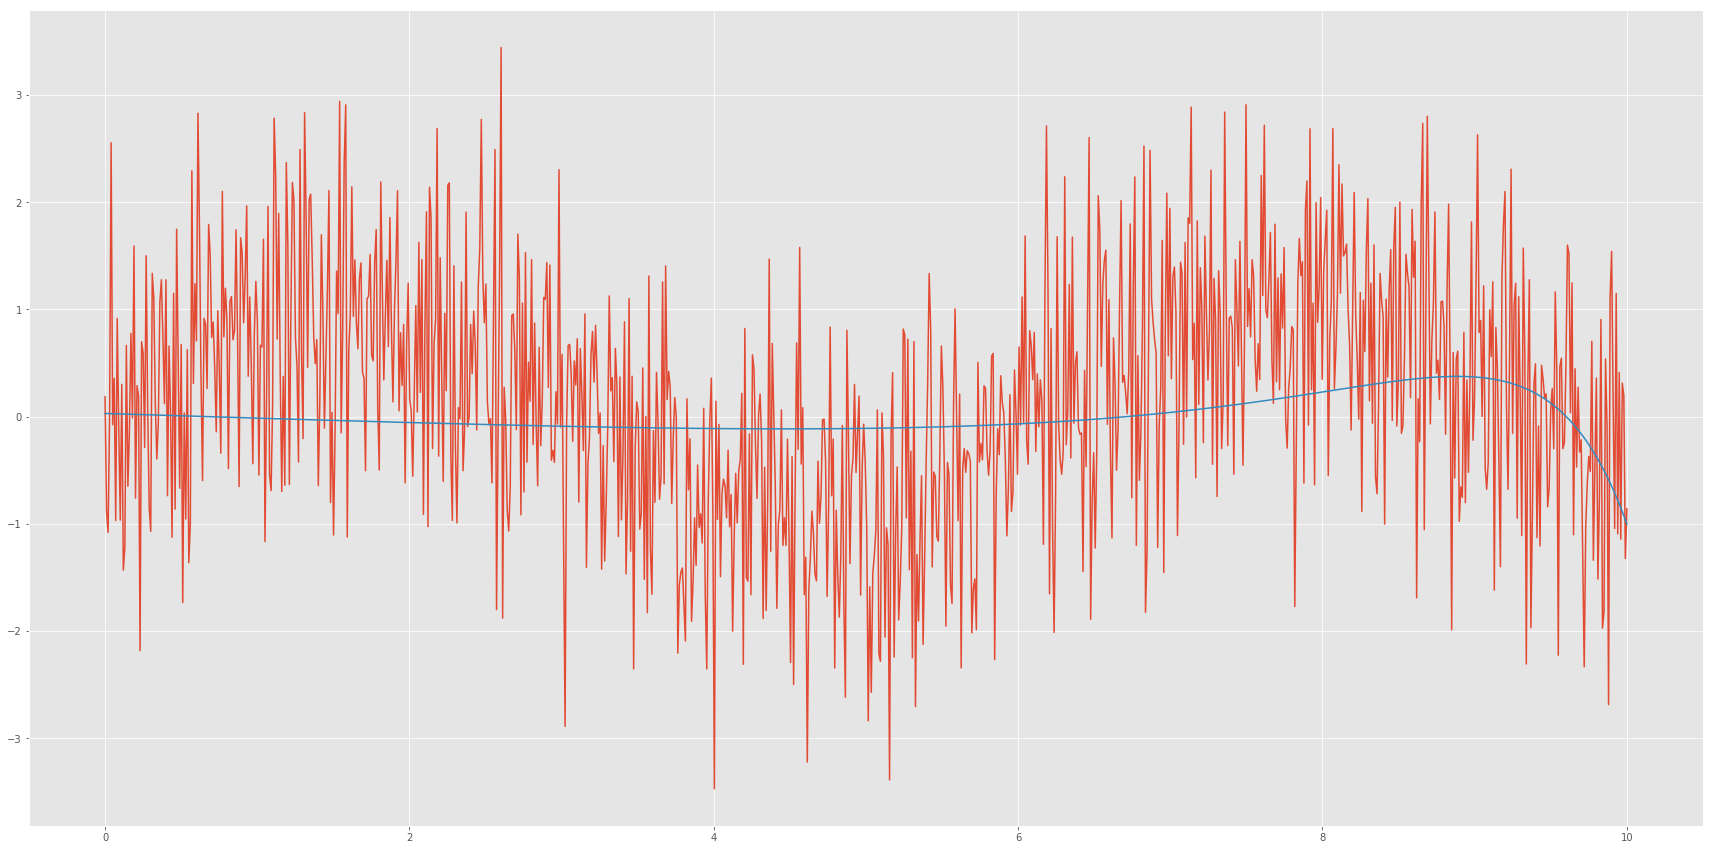

In [20]:
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.01
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                       100000, 0.96, staircase=True)

loss = tf.reduce_mean(tf.pow(y_ - model_output, 2)) + 0.85* tf.nn.l2_loss(w) + 0.15* tf.reduce_mean(tf.abs(w)) # функция потерь
gd = tf.train.GradientDescentOptimizer(learning_rate) #оптимизатор
train_step = gd.minimize(loss)
sess.run(tf.global_variables_initializer())
n_epochs = 1000

train_errors = []
test_errors = []
for i in tqdm.tqdm(range(n_epochs)): # 1000
    _, train_err = sess.run([train_step, loss ], feed_dict={x_:X_Train, y_: Y_Train.reshape(len(Y_Train),1)})
    train_errors.append(train_err)
    test_errors.append(sess.run(loss, feed_dict={x_:X_Test, y_: Y_Test.reshape((len(Y_Test),1))}))

print(train_errors[:10])
print(test_errors[:10])

# plotting
plt.plot(list(range(n_epochs)), train_errors, label = 'train' )
plt.plot(list(range(n_epochs)), test_errors, label='test') 
plt.legend()
plt.savefig('pngs/poly_reg.png')
plt.show()

plt.plot(x, y)
plt.plot(x,sess.run(model_output, feed_dict={x_:x_poly.reshape((len(x),order))}))
plt.savefig("pngs/poly_forward_pass.png")
plt.show()

### TF Useful Tools

In [21]:
saver = tf.train.Saver()

In [22]:
if not os.path.exists('ckpts/'):
    os.makedirs('ckpts/')

In [23]:
# save session/models
saver.save(sess, "ckpts/model.ckpt")

'ckpts/model.ckpt'

In [24]:
ckpt = tf.train.get_checkpoint_state('ckpts')

# sessesion_ckpt = tf.Session() # создаем сессию
sessesion_ckpt = tf.InteractiveSession() # создаем сессию
if ckpt and ckpt.model_checkpoint_path:
    print(ckpt.model_checkpoint_path)
    saver.restore(sessesion_ckpt, ckpt.model_checkpoint_path)
sessesion_ckpt

C:\Soft\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


ckpts\model.ckpt
INFO:tensorflow:Restoring parameters from ckpts\model.ckpt


In [25]:
# saving logs
tf.summary.histogram("layer_output", w)
tf.summary.scalar("accuracy", learning_rate)
merged = tf.summary.merge_all(key='summaries')
my_writer = tf.summary.FileWriter('tf-logs/nn_logs', sess.graph)